(qpe)=
# Quantum Phase Estimation (QPE)

```{index} Entry name
```

En este apartado vamos a explicar el algoritmo de quantum phase estimation (QPE), uno de los algoritmos más utilizados dentro de la computación cuántica. Para poder desarrollar desde cero este algoritmo, necesitamos antes proceder a recordar los conceptos de valor y vector propio de una matriz.

Dada una matriz A diremos que v es un vector propio de A y $\lambda$ su valor propio asociado, cuando se cumple lo siguiente:

$$A\cdot v = \lambda \cdot v$$

Entonces, el algoritmo QPE, nos dice los siguiente: supongamos que tenemos una matriz Unitaria U, y que se cumple los siguiente:


$${U}|\psi\rangle= \lambda|\psi\rangle$$

Y de esta manera podemos decir que $\psi$ es un vector propio de $U$, y $\lambda$ el valor propio asociado. Entonces este algoritmo QPE lo que resuelve es cual es este valor de $\lambda$. Ahora bien, hay que tener en cuenta que cuando trabajamos con matrices unitarias, se puede demostrar que $\lambda$ es de la forma $e^{2 \pi i \theta} $ (además la norma de los autovalores debe ser 1). Al valor $\theta$ se le suele llamar la fase del número complejo.

Así pues y resumiendo, este algoritmo nos va a permitir estimar el valor de $\theta$ en la expresión:
$${ U}|\psi\rangle=e^{2\pi i\theta}|\psi\rangle.$$

El circuito que nos va a permitir resolver este problema sería el siguiente:

![](../images/qpe_3.PNG)


Los t qubits de arriba los denominaremos qubits de estimación, mientras que el qubit de abajo correspondiente a $|psi \rangle$ lo denominaremos objetivo.

Veamos a continuación la demostración matemática de que esto es así.

El estado total de los n+a qubits, se puede representar de la siguiente manera:

$$|\psi_{0}\rangle=|0\rangle^{\otimes n}|\psi\rangle$$

Por otro lado, al aplicar una puerta de Hadamrd a las primeras n puertas, es resultado de esta acción es el siguiente:

$$|\psi_{1}\rangle=\frac{1}{2^{\frac{n}{2}}}(|0\rangle+|1\rangle)^{\otimes n}|\psi\rangle$$

Después de esta operación, debemos aplicar los operados de control CU, que aplica el operador U sobre el target sin el qubit de control vale $|1\rangle$. Si tenemos además en cuenta que U es unitaria con eigenvector $|\psi\rangle$, tal que ${ U}|\psi\rangle=e^{2\pi i\theta}|\psi\rangle$, entonces se verifica lo siguiente:

$U^{2^J}|\psi\rangle=U^{2^J-1}U|\psi\rangle=U^{2^J-1}e^{2\pi i\theta}|\psi\rangle=\cdots=e^{2\pi i 2^{J}\theta}|\psi\rangle$

Además hay que tener en cuenta que si aplicamos el operador de control $CU^{2^j}$ al estado ($|0\rangle +|1\rangle$), al primer qubit al estar en estado cero no le afecta pero si afecta al segundo por estar en estado 1, y al final quedará de la siguiente manera.

$$CU^{2^j}(|0\rangle+|1\rangle)=|0\rangle+e^{2\pi i \theta 2^{2^j}}$$

Teniendo todo esto en cuenta, después de aplicar todas las puertas de control, al qubit anterior $|\psi_{1}\rangle$, llegamos a la siguiente expresión:

$|\psi_{2}\rangle=\frac{1}{2^{\frac{n}{2}}}\Big(|0\rangle+e^{2\pi i\theta2^{n-1}}|1\rangle\Big)\otimes\cdots\otimes\Big(|0\rangle+e^{2\pi i\theta2^{n}}|1\rangle\Big)\otimes\Big(|0\rangle+e^{2\pi i\theta2^{n}}|1\rangle\Big)\otimes|\psi\rangle=\textcircled{1}$

Ahora hay que observar que la expresión anterior es una suma de productos, que si operamos entre ellos (por ejemplo $(|0\rangle+|1\rangle) \otimes  (|0\rangle)+|1\rangle)=|00\rangle +|01\rangle +|10\rangle +|11\rangle $), y ai además se tiene en cuenta que:

$|0\rangle\otimes|\psi\rangle+|{\bf1}\rangle\otimes e^{2\pi i\theta}|\psi\rangle=\left(|0\rangle+e^{2\pi i\theta}|{\bf1}\rangle\right)\otimes|\psi\rangle$

Entonces se llega a la siguiente conclusión:

$$\textcircled{1}=\frac{1}{2^{\frac{n}{2}}}\sum_{k=0}^{2^{n}-1}e^{2\pi i\theta k}|k\rangle\otimes|\psi\rangle$$

donde k denota la representación en número entero de un número binario.Este sería el estado que tendremos, mirando el esquema anterior antes de aplicar la puerta de la transformada inversa de Fourier.

Ahora bien, hay que tener en cuanta lo que hace la transformada cuántica de Fourier, QFT:

$$QFT|x\rangle\longrightarrow\frac{1}{\sqrt{2^{n}}}\sum_{k=0}^{2^{n}-1}e^{\frac{2\pi ixk}{2^{n}}}|k\rangle$$

Ahora si en la expresión anterior sustituimos $x=2^{n}\theta$

obtendremos que:

$QFT|x\rangle\longrightarrow\frac{1}{\sqrt{2^{n}}}\sum_{k=}^{2^{n}-1}e^{\frac{2\pi i\cancel{2^{n}}\theta k}{\cancel{2^{n}}}}|k\rangle$

Y esta expresión es justamente la suma de la izquierda de la expresión $\textcircled{1}$

Por lo tanto si ahora aplicamos la QFT inversa se tiene: $|2^{n}\theta\rangle$

que es el valor obtenido en la medición del diagrama anterior.

Por lo tanto obtenido este valor, si lo dividimos por $2^n$ obtendríamos la estimación del parámetro $\theta$. Aproximación a esta valor que estará más acurada, cuantos más qubits utilicemos.

A continuación vamos crear código en qiskit para la implementación del algoritmo, para lo cual vamos a utilizar la puerta T-gate, para ello recordemos que la Puerta T actuando sobre el qubit $|1\rangle$ actúa  de la siguiente manera:

$$T|1\rangle=\left[\begin{array}{cc}
1 & 0\\
0 & e^{\frac{i\pi}{4}}
\end{array}\right]\left[\begin{array}{c}
0\\
1
\end{array}\right]=e^{\frac{i\pi}{4}}|1\rangle$$

Puesto que el algoritmo QPE obtiene $\theta$ donde:

$$T|1\rangle =e^{2\pi i \theta}|1\rangle$$

Se debería tener por este algoritmo un valor de $\theta=\frac{1}{8}$.

Veamos cómo se hace con el siguiente código:



In [1]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

# import basic plot tools
from qiskit.visualization import plot_histogram

Como en este ejemplo  $|\psi\rangle=|1\rangle$, aplicaremos la puerta X al último qubit


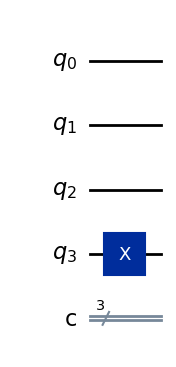

In [2]:
qpe = QuantumCircuit(4, 3)
qpe.x(3)
qpe.draw('mpl',style='iqp')

Ahora aplicamos una puerta Hadamard a los tres primeros qubits

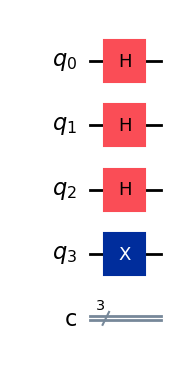

In [3]:
for qubit in range(3):
    qpe.h(qubit)
qpe.draw('mpl',style='iqp')

Ahora aplicamos las puertas controladas, pero recordar que qiskit ordena los qubits de forma inversa a la mostrada en la imagen anterior

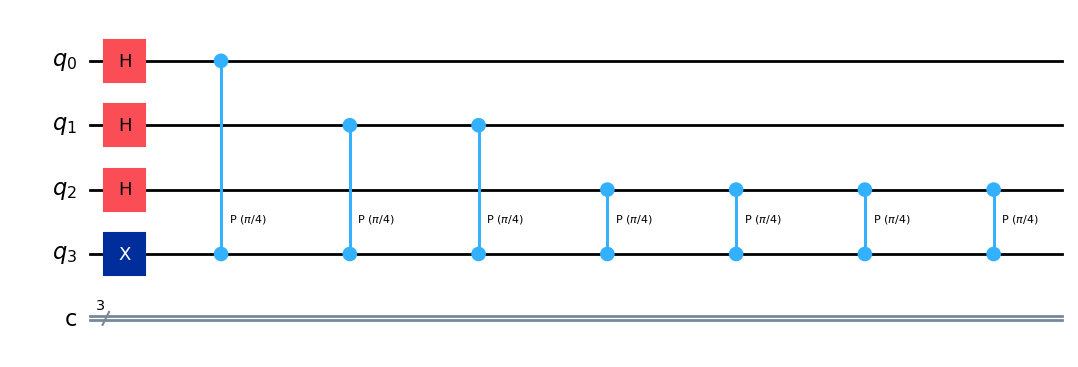

In [4]:
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe.cp(math.pi/4, counting_qubit, 3); # This is CU
    repetitions *= 2
qpe.draw('mpl',style='iqp')

Ahora nos queda aplicar las transformada inversa de Fourier a los qubits de estimación

In [5]:
def qft_dagger(qc, n):
    """n-qubit QFTdagger los primero n qubits del circuito"""
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-math.pi/float(2**(j-m)), m, j)
        qc.h(j)

Al final tomamos la medición del circuito

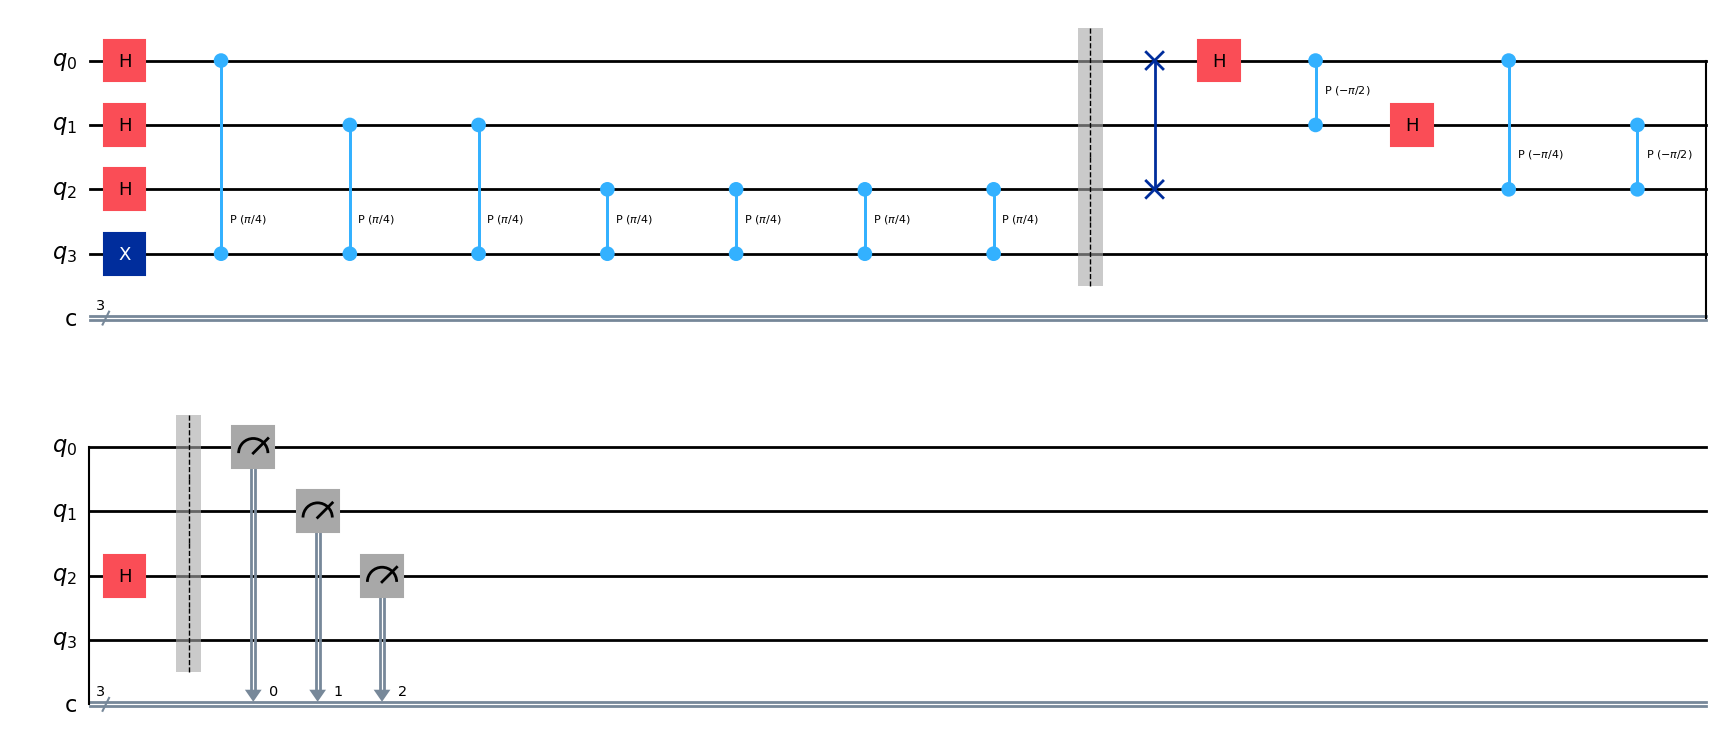

In [6]:
qpe.barrier()
# Aplicamos la inversa de QFT
qft_dagger(qpe, 3)
# Medimos en los tres primero qubits
qpe.barrier()
for n in range(3):
    qpe.measure(n,n)
    
qpe.draw('mpl',style='iqp')

C:\Users\Francisco\AppData\Local\Temp\ipykernel_19652\54324529.py:2: DeprecationWarning: The 'qiskit.Aer' entry point is deprecated and will be removed in Qiskit 1.0. You should use 'qiskit_aer.Aer' directly instead.
  aer_sim = Aer.get_backend('aer_simulator')


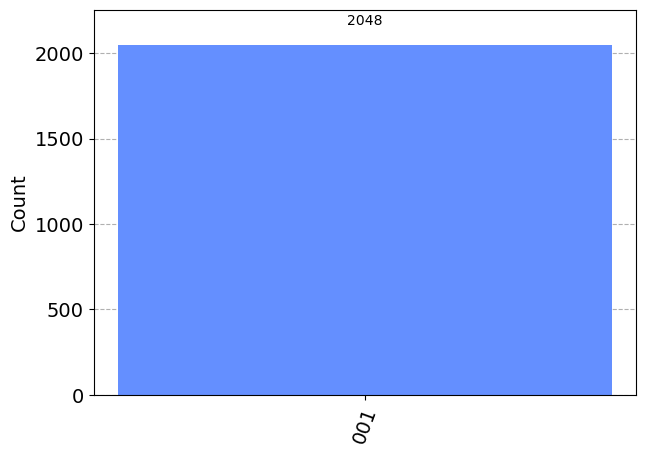

In [7]:
# obtengamos el resultado
aer_sim = Aer.get_backend('aer_simulator')
shots = 2048
t_qpe = transpile(qpe, aer_sim)
#qobj = assemble(t_qpe, shots=shots)
results = aer_sim.run(t_qpe,shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

Obtenemos el resultado $|00\rangle$ que en decimal será 1. Ahora de acuerdo con el algoritmo hay que dividir este resultado por $2^3=8$, y en consecuencia el resultado obtenido para la fase es $\theta=1/8$.

En lugar de una puerta T, vamos a utilizar una puerta con $\theta=1/3$, en este caso el circuito será el siguiente: 

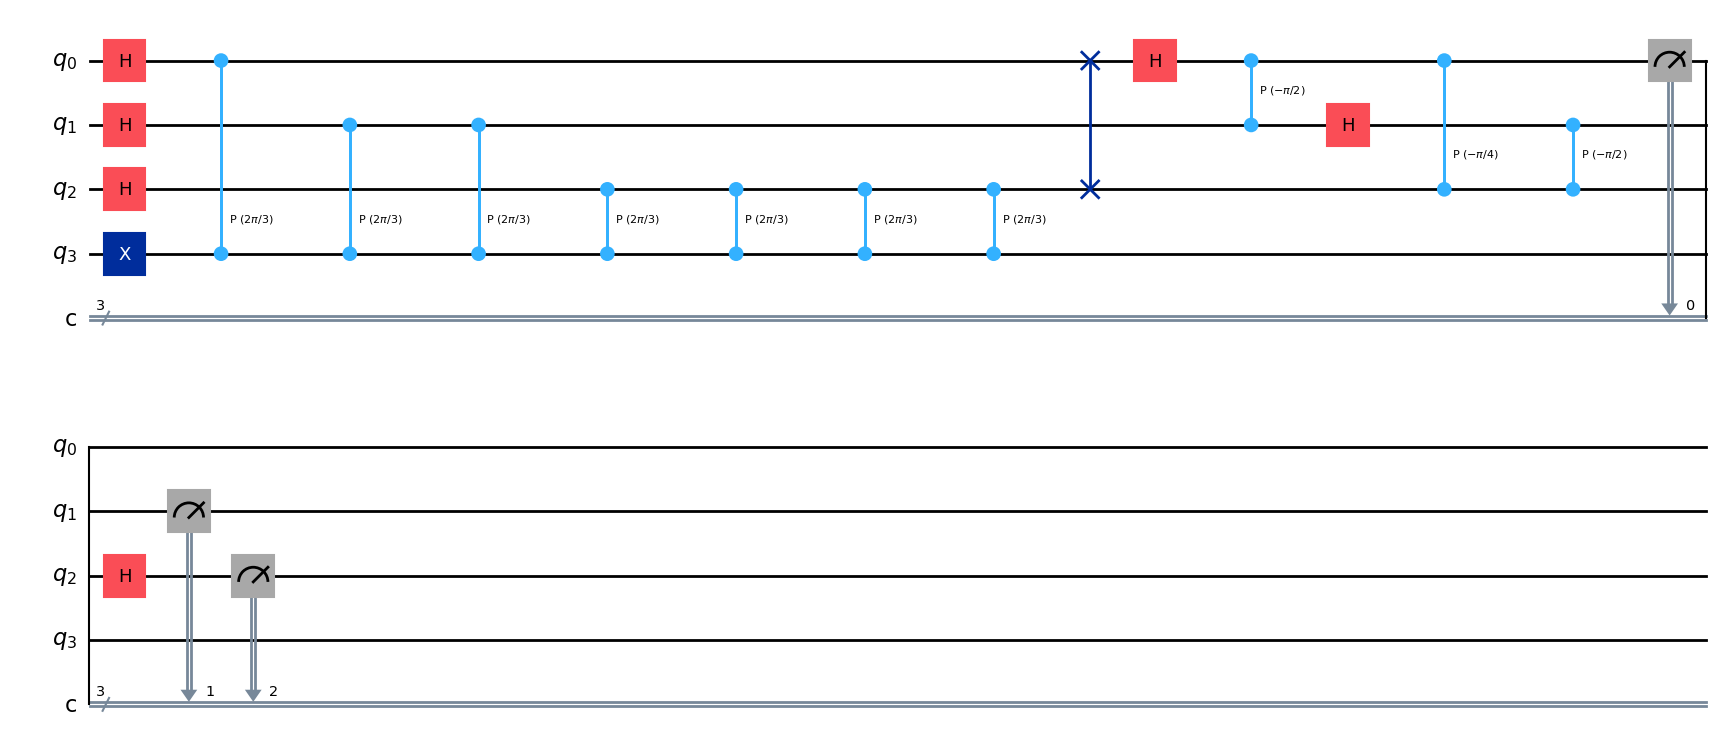

In [8]:
# Creamos el ciruito
qpe2 = QuantumCircuit(4, 3)

# Aplicamos puerta H a los tres primeros qubits
for qubit in range(3):
    qpe2.h(qubit)

# Ponemos el último qubit a 1
qpe2.x(3)

# Aplicamos control-U sobre los tres primeros qubits
angle = 2*math.pi/3
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe2.cp(angle, counting_qubit, 3);
    repetitions *= 2

# Aplicamos QFT inversa
qft_dagger(qpe2, 3)

# Hacemos la medición
for n in range(3):
    qpe2.measure(n,n)

qpe2.draw('mpl',style='iqp')

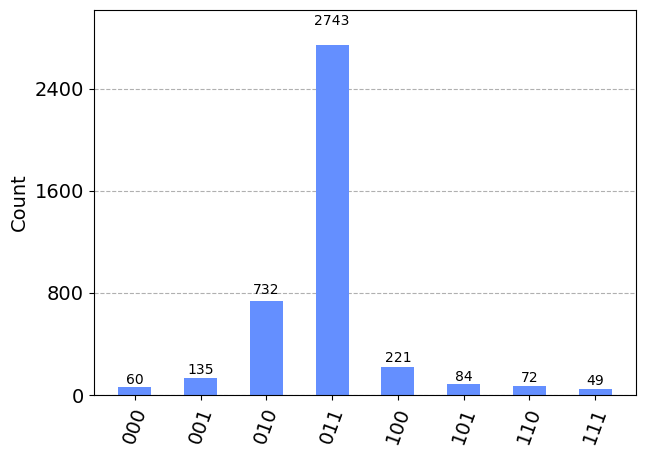

In [9]:
#obtenemos los resultados

aer_sim = Aer.get_backend('aer_simulator')
shots = 4096
t_qpe2 = transpile(qpe2, aer_sim)
#qobj = assemble(t_qpe2, shots=shots)
results = aer_sim.run(t_qpe2, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

Obtenemos como primer resultado el 3 ( el 011 den binario), lo que implica un valor de $\theta$=3/8=0.375 (recordar que estamos intentado aproximar $\theta=0.3333$). Con el segundo valor obtenido(010 = 2 en decimal)se obtiene como estimación $\theta=2/8=0.25$.

Incrementemos el número de qubits para comprobar que nos acercamos más al verdadero valor de $\theta$.

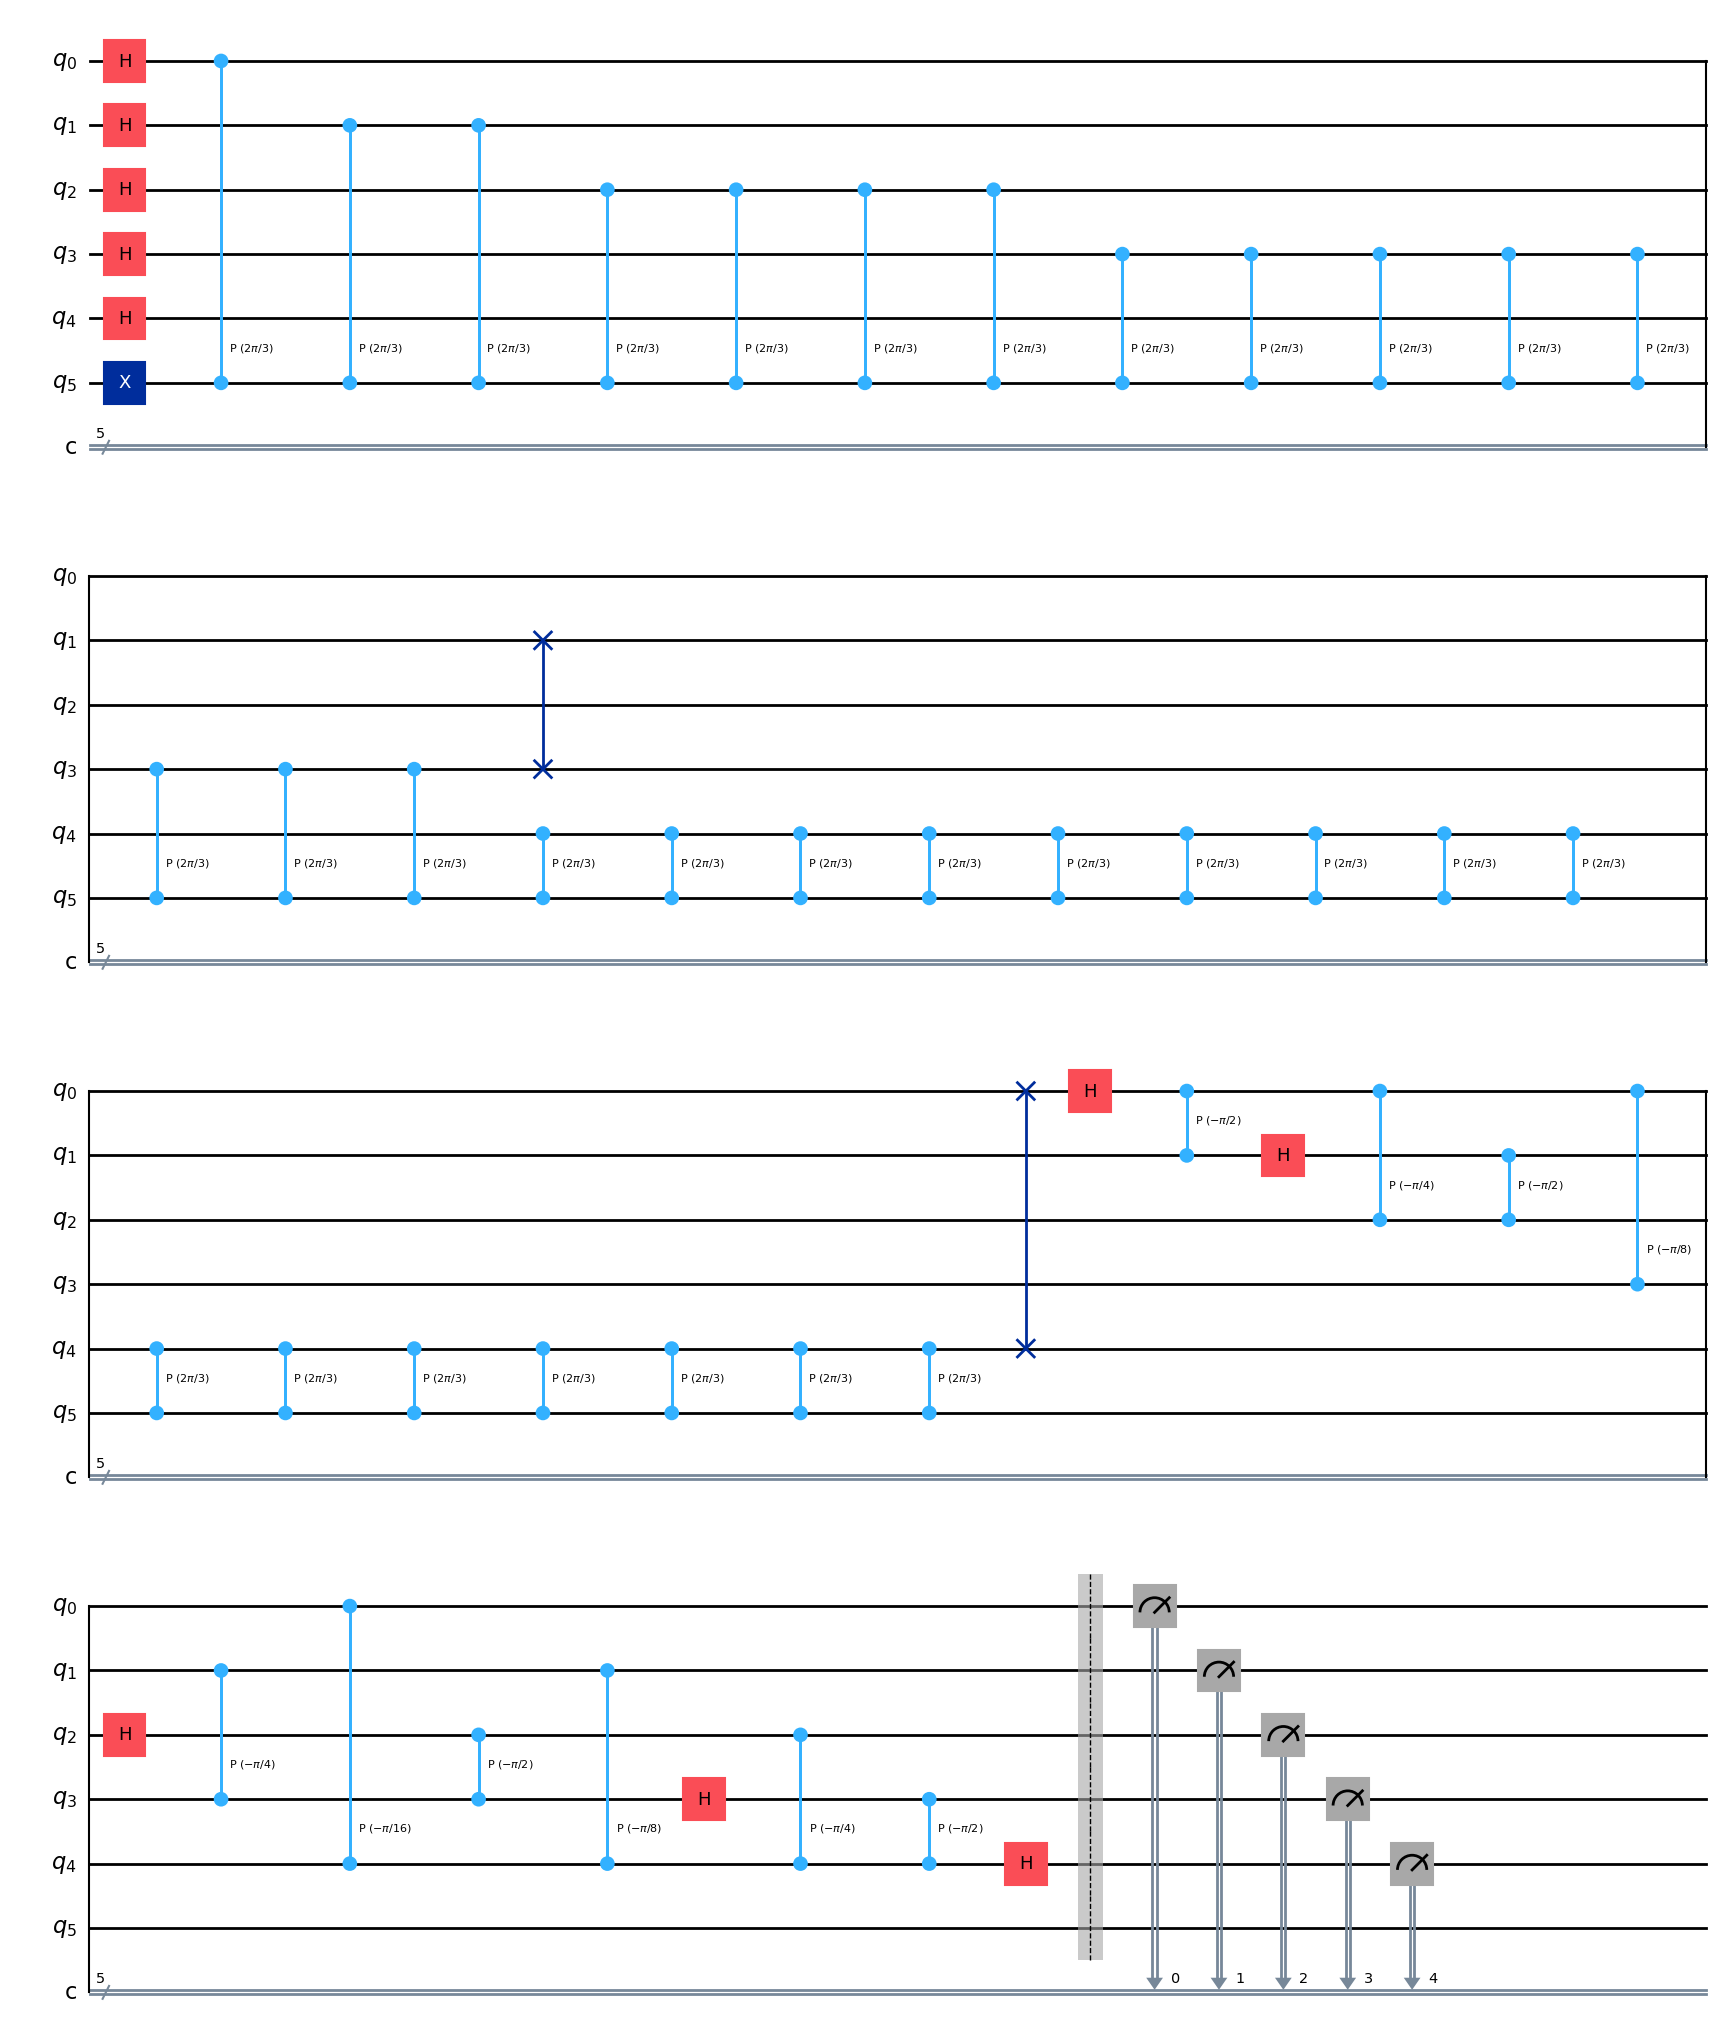

In [10]:
# Creamos el circuito con 5 qubits y 5 bits de medición
qpe3 = QuantumCircuit(6, 5)

# aplicamos puerta H
for qubit in range(5):
    qpe3.h(qubit)

# Pasamos a 1 el qubit 5
qpe3.x(5)

# Ejecutamos las puerta U controladas:
angle = 2*math.pi/3
repetitions = 1
for counting_qubit in range(5):
    for i in range(repetitions):
        qpe3.cp(angle, counting_qubit, 5);
    repetitions *= 2

#  Aplicamos la inversa QFT:
qft_dagger(qpe3, 5)

# Ahora medimos
qpe3.barrier()
for n in range(5):
    qpe3.measure(n,n)

qpe3.draw('mpl',style='iqp')

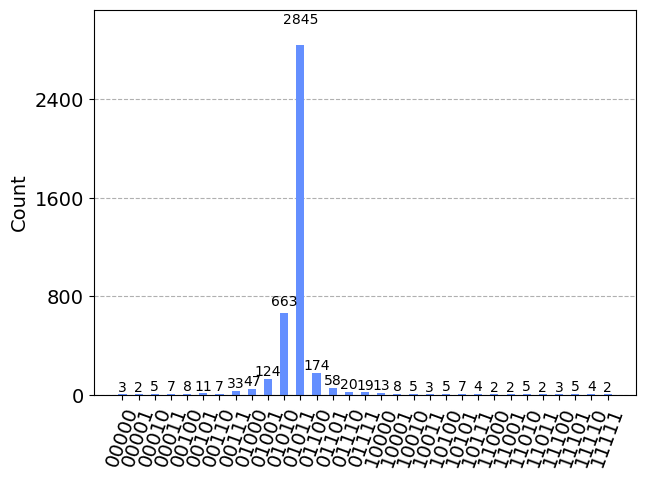

In [11]:
# Obtengamos los resultados
aer_sim = Aer.get_backend('aer_simulator')
shots = 4096
t_qpe3 = transpile(qpe3, aer_sim)
#qobj = assemble(t_qpe3, shots=shots)
results = aer_sim.run(t_qpe3, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

el valor que obtenemos es 01011 ( en decimal 11) y 01010 ( en decimal 10). Por lo tanto los valores que obtenemos serían los siguientes:

$\theta==\frac{11}{2^5}=0.3444$ o $\theta =\frac{10}{2^5}=0.313$

**NOTA FINAL**. Si se quiere ver una implementación de este algoritmo en PennyLine, se puede ver <a href="https://www.youtube.com/watch?v=Z6OCaqQGIWY" target="_blank"> en este vídeo </a>, del cual se ha obtenido <a href="../documentos/QuantumPhaseEstimation.ipynb" target="_blank"> este jupyter </a> que se puede descargar con el anterior enlace.

In [12]:
import qiskit.tools.jupyter

%qiskit_version_table

C:\Users\Francisco\AppData\Local\Temp\ipykernel_19652\358704368.py:1: DeprecationWarning: qiskit.tools.jupyter is deprecated and will be removed in Qiskit 1.0.0
  import qiskit.tools.jupyter
